In [1]:
import json
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_dataframe(matrix, save_xlsx=False):
    with open(f"raw_data/matrix_{matrix}/{matrix}.bmerawdata") as f:
        j = json.load(f)
    column_names = [el["name"] for el in j["rawDataBody"]["dataColumns"]]
    df = pd.DataFrame(j["rawDataBody"]["dataBlock"], columns=column_names)

    if save_xlsx:
        df.to_excel(f"raw_data/matrix_{matrix}/{matrix}.xlsx")

    return df

In [10]:
df = get_dataframe(1, save_xlsx=True)

In [3]:
def build_sensor_data(df):
    df["Date"] = pd.to_datetime(
        df["Real time clock"],
        unit="s",
        utc=True).map(lambda x: x.tz_convert("Europe/Istanbul"))
    df["Date"] = df["Date"].dt.tz_localize(None)

    sensor_indexes = sorted(df["Sensor Index"].unique())

    sensors = {}
    for i in sensor_indexes:
        sensors[i] = {}
        sensor = df[df["Sensor Index"] == i]
        heater_indexes = sorted(sensor["Heater Profile Step Index"].unique())
        for j in heater_indexes:
            sensors[i][j] = sensor[sensor["Heater Profile Step Index"] == j]

    return sensors

In [4]:
def build_raw_data_pickle(save_pickle=False):
    sensor_data = {}
    for matrix in range(2):
        df = get_dataframe(matrix)
        sensor_data[f"mat_{matrix}"] = build_sensor_data(df)

    if save_pickle:
        with open("raw_sensor_data.pkl", "wb") as f:
            pickle.dump(sensor_data, f)

    return sensor_data

In [5]:
sensor_data = build_raw_data_pickle(save_pickle=True)

In [6]:
sensor_data["mat_0"][0][0]

,Sensor Index,Sensor ID,Time Since PowerOn,Real time clock,Temperature,Pressure,Relative Humidity,Resistance Gassensor,Heater Profile Step Index,Scanning Mode Enabled,Scanning Cycle Index,Label Tag,Error Code,Date
0,0,355892538,7293,1729690954,23.094288,933.551636,51.794575,4.871551e+05,0,1,1,0,0,2024-10-23 16:42:34
42,0,355892538,18107,1729690964,25.137608,933.588440,43.242580,1.389888e+06,0,1,1,0,0,2024-10-23 16:42:44
84,0,355892538,28949,1729690975,25.888840,933.563782,40.120213,2.017734e+06,0,1,1,0,0,2024-10-23 16:42:55
130,0,355892538,39775,1729690986,26.329565,933.581726,38.092548,2.502138e+06,0,1,1,0,0,2024-10-23 16:43:06
168,0,355892538,50640,1729690997,26.750259,933.577087,37.038361,2.967041e+06,0,1,1,0,0,2024-10-23 16:43:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343270,0,355892538,85551184,1729776509,38.315132,933.326477,18.561638,9.301164e+06,0,1,1,0,0,2024-10-24 16:28:29
343313,0,355892538,85562152,1729776520,38.372734,933.291138,18.559952,9.277463e+06,0,1,1,0,0,2024-10-24 16:28:40
343358,0,355892538,85572945,1729776530,38.420315,933.283325,18.510838,9.372998e+06,0,1,1,0,0,2024-10-24 16:28:50
343400,0,355892538,85583712,1729776541,38.327652,933.311707,18.515591,9.277463e+06,0,1,1,0,0,2024-10-24 16:29:01


In [7]:
def plot_sensor(matrix, sensor_idx, sensor_data):
    plt.figure(figsize=(8, 4))
    plt.title(f"Matrix {matrix}, Sensor {sensor_idx}")
    plt.yscale("log")
    for hp_idx, val in sensor_data[f"mat_{matrix}"][sensor_idx].items():
        resistance = val["Resistance Gassensor"].values
        time_ms = val["Time Since PowerOn"].values
        plt.plot(time_ms, resistance, label=f"HP {hp_idx}")
    plt.legend()
    plt.show()

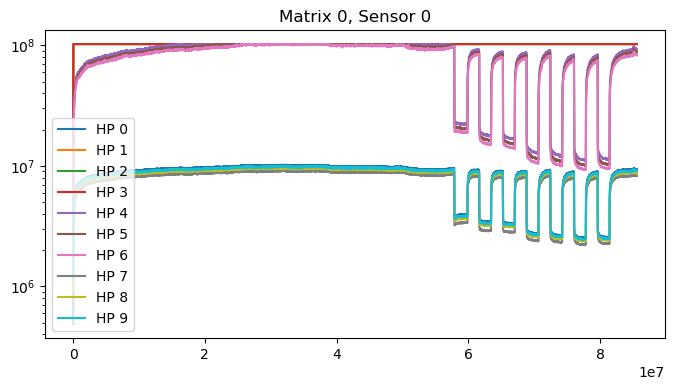

In [8]:
plot_sensor(0, 0, sensor_data)